# SF GoBike Sharing Data Exploration
## by Gbenga Sorinola

## Introduction

This data set includes information about individual rides made in a gobike-sharing system in the month of February, covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load the dataset and output the first 10 rows
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
# output an overview of the dataset, including the column names, number of columns and rows, and the datatype for each column
print('The dataset shape:', gobike.shape)
gobike.info()

The dataset shape: (183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        17

First, we need to perform some initial data cleaning, which includes:
- Checking for duplicates
- Changing the datatypes of some of the variables
- Dropping columns we are not using
- Dropping missing values

In [5]:
def unique(x):
    count = 0
    for i in gobike[x].unique():
        count += 1
    return count

In [6]:
print('Unique Bike IDs:', unique('bike_id'))
print('Unique Start Stations:', unique('start_station_name'))
print('Unique End Stations:', unique('end_station_name'))

Unique Bike IDs: 4646
Unique Start Stations: 330
Unique End Stations: 330


In [7]:
# check for duplicate rows
gobike.duplicated().sum()

0

There are no duplicated rows.

Let's proceed to remove the variables we don't need for this project:

- start_station_latitude
- start_station_longitude
- end_station_latitude
- end_station_longitude

In [8]:
drop_col = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
gobike = gobike.drop(drop_col, axis = 1)
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


Drop missing values as it won't have significant impact on the dataset:

In [9]:
gobike = gobike.dropna()
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.4+ MB


We will now change the variables to the correct datatypes:

In [10]:
gobike[['start_station_id', 'end_station_id', 'member_birth_year']] = gobike[['start_station_id', 'end_station_id', 'member_birth_year']].astype('int')
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])
gobike[['user_type', 'member_gender', 'bike_share_for_all_trip']] = gobike[['user_type', 'member_gender', 'bike_share_for_all_trip']].astype('category')
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), 

In [11]:
# descriptive statistics for numeric variables
gobike.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135
std,1642.204905,111.648819,111.335635,1659.195937,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000


### What is the structure of your dataset?

The initial dataset consist of 183412 gobike rides with 16 variables. Here are some of them:

- Duration (seconds)
- Start time (hh:mm:ss)
- End time (hh:mm:ss)
- Start station ID
- Start station name
- End station ID
- End station name
- gobike ID
- User type (Subscriber/Customer)
- Member Gender (Male/Female/Others)
- Bike share for all trip (Yes/No)
- Member Birth Year (years)

### What is/are the main feature(s) of interest in your dataset?

The main variable of interest is `duration_sec`. I will look explore its relationship with the other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Here are the variables that can possibly support my investigation:
- user type
- member gender
- day
- hour of the day
- bike sharing


## Univariate Exploration

### First, we explore the distribution of `duration_sec`

- distribution
- variation

In [12]:
gobike['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

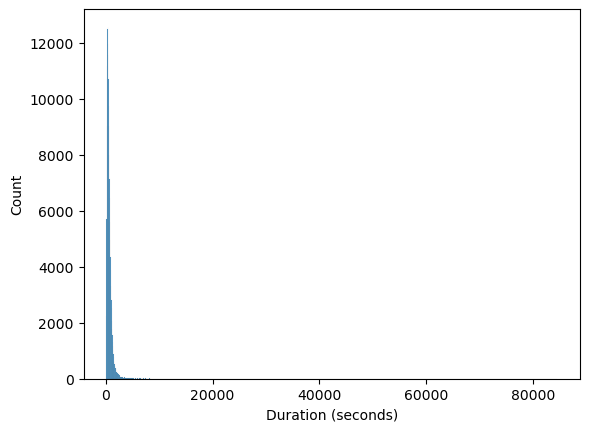

In [57]:
bin_edges = np.arange(61, gobike['duration_sec'].max()+50, 50)
plt.hist(gobike['duration_sec'], bins = bin_edges);
plt.xlabel('Duration (seconds)');

Most of the data appears to be below 20000. Let's set a limit on the x-axis:

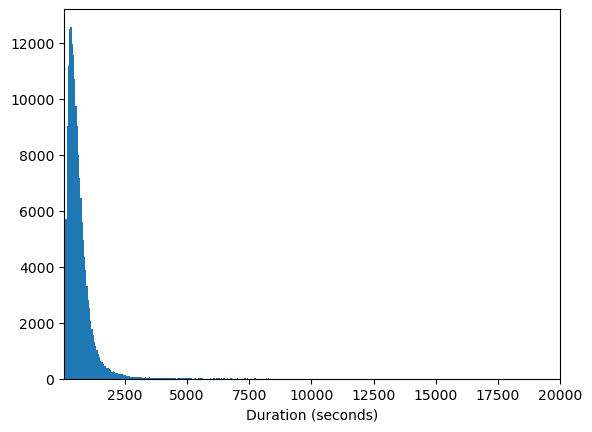

In [14]:
bin_edges = np.arange(61, gobike['duration_sec'].max()+50, 50)
plt.hist(gobike['duration_sec'], bins = bin_edges);
plt.xlabel('Duration (seconds)');
plt.xlim((61, 20000));

Let's reduce the limit to 5000:

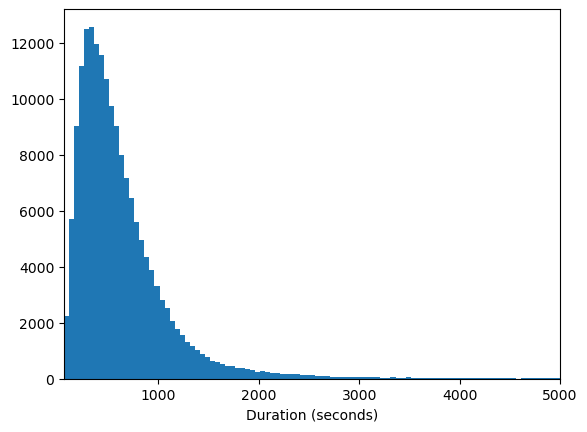

In [15]:
bin_edges = np.arange(61, gobike['duration_sec'].max()+50, 50)
plt.hist(gobike['duration_sec'], bins = bin_edges);
plt.xlabel('Duration (seconds)');
plt.xlim((61, 5000));

The variable is right-skewed with a long-tail.

The majority of the gobike ride duration are under 4000 seconds, and clustered between 61 - 2500 seconds. Let's apply log transformation to understand its distribution.

In [16]:
np.log10(gobike['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

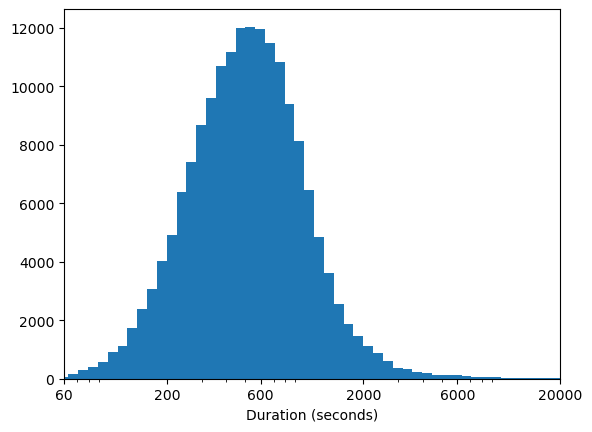

In [17]:
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
ticks = [60, 200, 600, 2000, 6000, 20000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(gobike['duration_sec'], bins = bins);
plt.xscale('log');
plt.xlim((60,20000))
plt.xticks(ticks, labels);
plt.xlabel('Duration (seconds)');

The distribution is unimodal with a long tail that extends to the maximum value. Are these extreme values normal or are a result of an error?

Let's check the average trip duration:

In [18]:
avg_trip_duration = np.sum(gobike['duration_sec'])/gobike['duration_sec'].shape[0]
print('Average trip duration:', avg_trip_duration)

Average trip duration: 704.0027436096758


**The average trip duration is approximately 11.73 minutes.**

That should give an understanding of the distance between the start stations and end stations. Based on this information, we can make an assumption that the trips are mostly taken by those commuting to work, and from work to home.

With an average trip duration of about **704 seconds**, we have to wonder why there are trips over 3600 seconds (1 hour). Let check if these are outliers or an error:

In [19]:
# check top 20 trips with the longest duration
gobike.sort_values(by = 'duration_sec', ascending = False).head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
85465,84548,2019-02-16 15:48:25.029,2019-02-17 15:17:33.080,3,Powell St BART Station (Market St at 4th St),368,Myrtle St at Polk St,6301,Subscriber,1981,Male,No
127999,83519,2019-02-09 15:16:17.537,2019-02-10 14:28:17.270,72,Page St at Scott St,43,San Francisco Public Library (Grove St at Hyde...,5561,Customer,1990,Male,No
112435,83407,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,77,11th St at Natoma St,344,16th St Depot,1842,Customer,1988,Male,No
5203,83195,2019-02-27 14:47:23.181,2019-02-28 13:53:58.433,243,Bancroft Way at College Ave,248,Telegraph Ave at Ashby Ave,5781,Subscriber,1962,Female,Yes
95750,82512,2019-02-14 13:56:21.728,2019-02-15 12:51:34.315,368,Myrtle St at Polk St,44,Civic Center/UN Plaza BART Station (Market St ...,6152,Customer,1998,Other,No
8631,81549,2019-02-27 09:41:38.552,2019-02-28 08:20:48.386,138,Jersey St at Church St,140,Cesar Chavez St at Dolores St,2266,Subscriber,1963,Female,No
107581,79548,2019-02-12 17:45:50.536,2019-02-13 15:51:38.859,79,7th St at Brannan St,66,3rd St at Townsend St,1718,Customer,1995,Female,No
90195,74408,2019-02-15 16:54:01.060,2019-02-16 13:34:09.367,3,Powell St BART Station (Market St at 4th St),86,Market St at Dolores St,4714,Subscriber,1988,Male,No
86454,74097,2019-02-16 16:20:41.465,2019-02-17 12:55:38.467,99,Folsom St at 15th St,139,Garfield Square (25th St at Harrison St),6235,Subscriber,1980,Male,No
123383,73930,2019-02-10 13:03:36.404,2019-02-11 09:35:46.446,270,Ninth St at Heinz Ave,270,Ninth St at Heinz Ave,1333,Subscriber,1989,Female,No


In [20]:
# subset the main dataset, focusing on trips equals to or more than an hour
long_trips = gobike[gobike['duration_sec'] >= 3600] # 3600 seconds make an hour
long_trips['duration_sec'].describe()

count     1386.000000
mean     11411.148629
std      14154.108178
min       3601.000000
25%       4407.500000
50%       6078.500000
75%      10237.750000
max      84548.000000
Name: duration_sec, dtype: float64

There are 1,386 trips that have 1 hour or more than an hour duration. Let's look at the distribution:

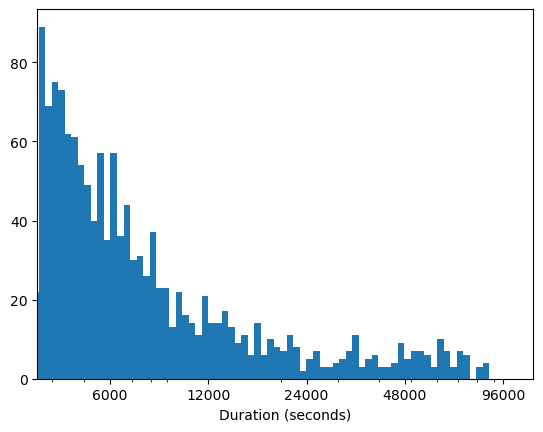

In [21]:
bins = 10 ** np.arange(3.5, 5+0.02, 0.02)
ticks = [6000, 12000, 24000, 48000, 96000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(long_trips['duration_sec'], bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim(3601); 
plt.xlabel('Duration (seconds)');

The distribution is right-skewed. We can see a gentle drop with multiple peaks as the duration increases. 

It appears to be a common occurence for trips to be over an hour with some trips even close to 24 hours. It is quite fascinating to see that some of the longest trips were made by subscribers who are more likely to be locals than tourists.

We will need to dig into this in the bivariate plot.

### Start Station and End Station

Let's look at the most frequented stations. That is the start stations and end stations with the most bike trips.

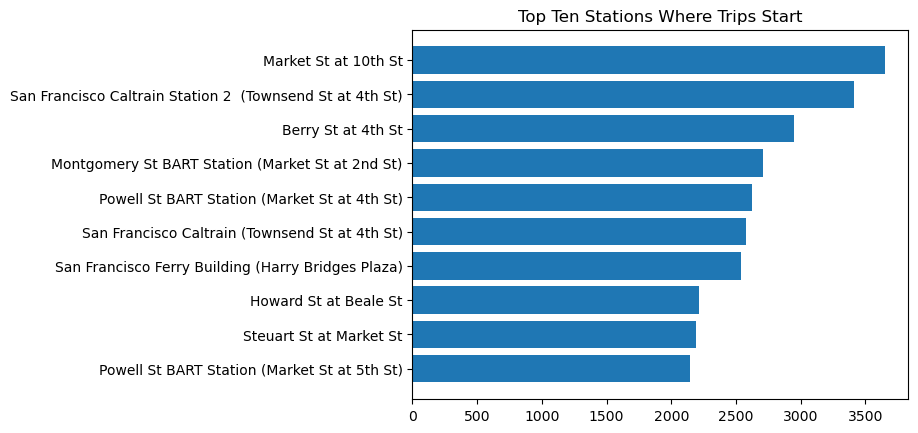

In [22]:
# bar plot for start_station_name
start_station_count = gobike['start_station_name'].value_counts()[:10].sort_values(ascending = True)
station_name = start_station_count.index
plt.barh(station_name, start_station_count);
plt.title('Top Ten Stations Where Trips Start');

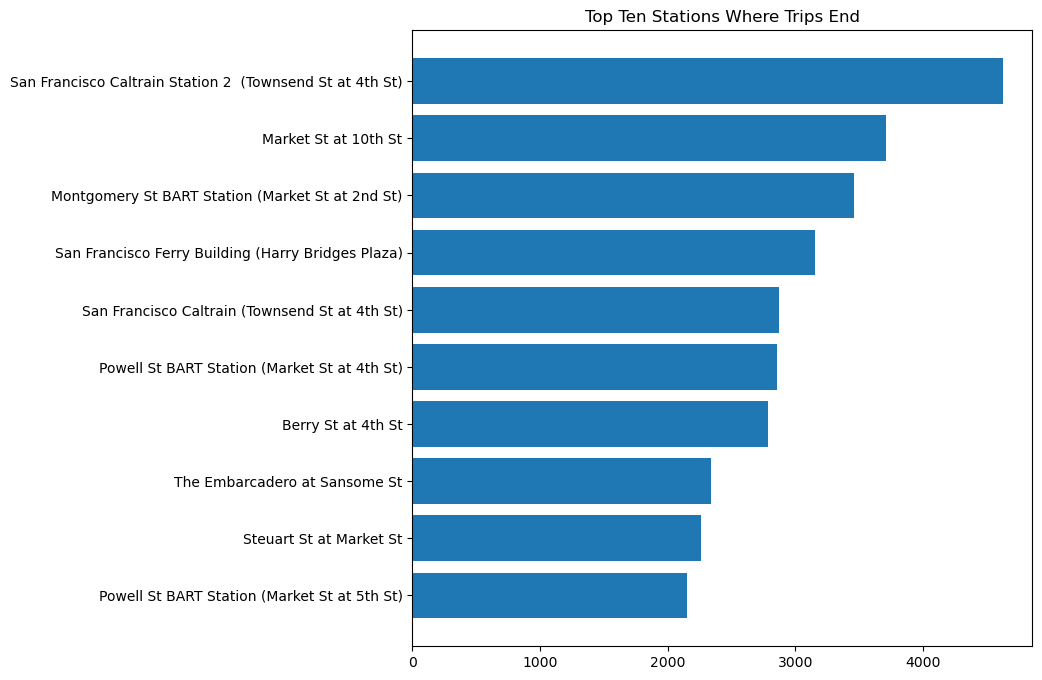

In [23]:
# bar plot for end_station_name
plt.figure(figsize = [8,8])
end_station_count = gobike['end_station_name'].value_counts()[:10].sort_values(ascending = True)
station_name = end_station_count.index
plt.barh(station_name, end_station_count);
plt.title('Top Ten Stations Where Trips End');

A quick search on Google shows why these stations are quite popular. They are some of the major thoroughfares in San Francisco. 

Market St at 10th St has always been a major transit artery for the city of San Francisco since it was first laid out in 1839. It is home to the Market Street Subway, which carries Muni Metro and  Bay Area Rapid Transit (BART). San Francisco Caltrain stations are a train system that serve a significant number of the city's population each day. San Francisco Ferry Building (Harry Bridges Plaza) is a hotspot for locals and tourists alike. Montgomery St BART Station (Market St at 2nd St) and Powell St BART Station (Market St at 4th St) are close to Market Street and have BART and Muni Metro Rapid transit stations. 

### Member Age

Age is one of the variables that might have a significant relationship with duration. Do users tend to be younger or older? Which age-group do most users fall in?

Let's look at the age distribution of users.

In [24]:
# descriptive statistics of birth_year
gobike['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

The minimum birth year is 1878. That means we have people over 100 years going on gobike trips as at 2019. A quick search on the Google shows that the oldest cyclist was 109 years old.

**To fit our data to reality we will remove ages over 98**:

In [25]:
# create a new variable: member_age
gobike['member_age'] = 2019 - gobike['member_birth_year']

# drop birth year
gobike = gobike.drop('member_birth_year', axis = 1)

# remove ages above 98
gobike = gobike[gobike['member_age'] <= 98]
gobike['member_age'].describe()

count    174877.00000
mean         34.16093
std           9.97047
min          18.00000
25%          27.00000
50%          32.00000
75%          39.00000
max          92.00000
Name: member_age, dtype: float64

**Let's check the distribution of the user age**:

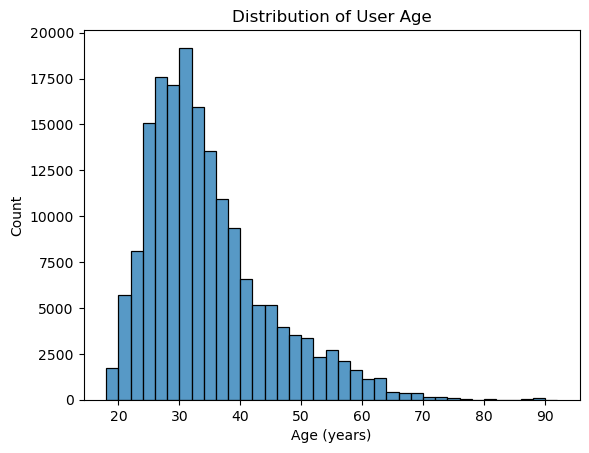

In [220]:
# set the bins
bin_edges = np.arange(18, 92+2, 2)

# create a histplot of user age
sb.histplot(gobike['member_age'], bins = bin_edges);
plt.title("Distribution of User Age")
plt.xlabel('Age (years)');

The birth year distribution is right-skewed. We can see peaks as the age increases and then falls. Age peaks at 30 - 31 years and gradually drops. 

From the distribution, the majority of the users fall under Gen X and Millenials. It will be interesting to see which age groups go on longer trips.

### User Type

Here is another variable that might show an interesting relationship with `duration_sec`.

What percentage of subscribers or customers make up the trips?

`user_type` is a nominal categorical variable. We will check the relative proportion of subscribers to customers:

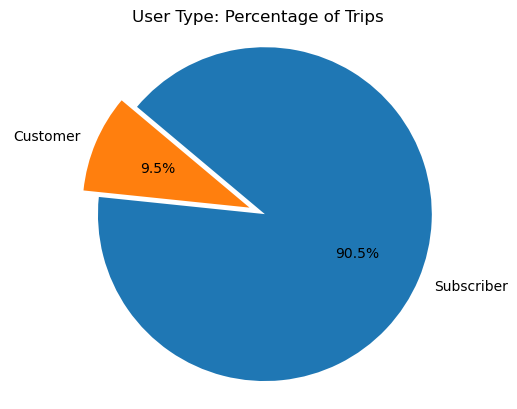

In [221]:
# get the count for each user type
user_count = gobike['user_type'].value_counts()
labels = user_count.index
explode = (0.0, 0.1)

# create a pie chart
plt.pie(user_count, labels = labels, startangle = 140, counterclock = False, 
        autopct='%1.1f%%', explode = explode);
plt.axis('equal');
plt.title('User Type: Percentage of Trips');

90.5% of the trips are from recurring users that have subscribed. While the remaining 9.5% are either one-time users or people that use the service infrequently. 

One thing we will look to explore in the bivariate plot is if the `user_type` influence trip duration. That is, do customers take longer trips than subscribers.

### Start Hour and End Hour

What time do most trips start and end? Do they start early in the day and end late at night, or otherwise?

To determine the hours the trips start and end, we will have to create new variables: `start_hour` and `end_hour`

In [28]:
# create start_hour and end_hour variables
gobike['start_hour'] = gobike['start_time'].dt.hour
gobike['end_hour'] = gobike['end_time'].dt.hour

Next, we plot a distribution of the `start_hour` and `end_hour` using `sb.countplot()`

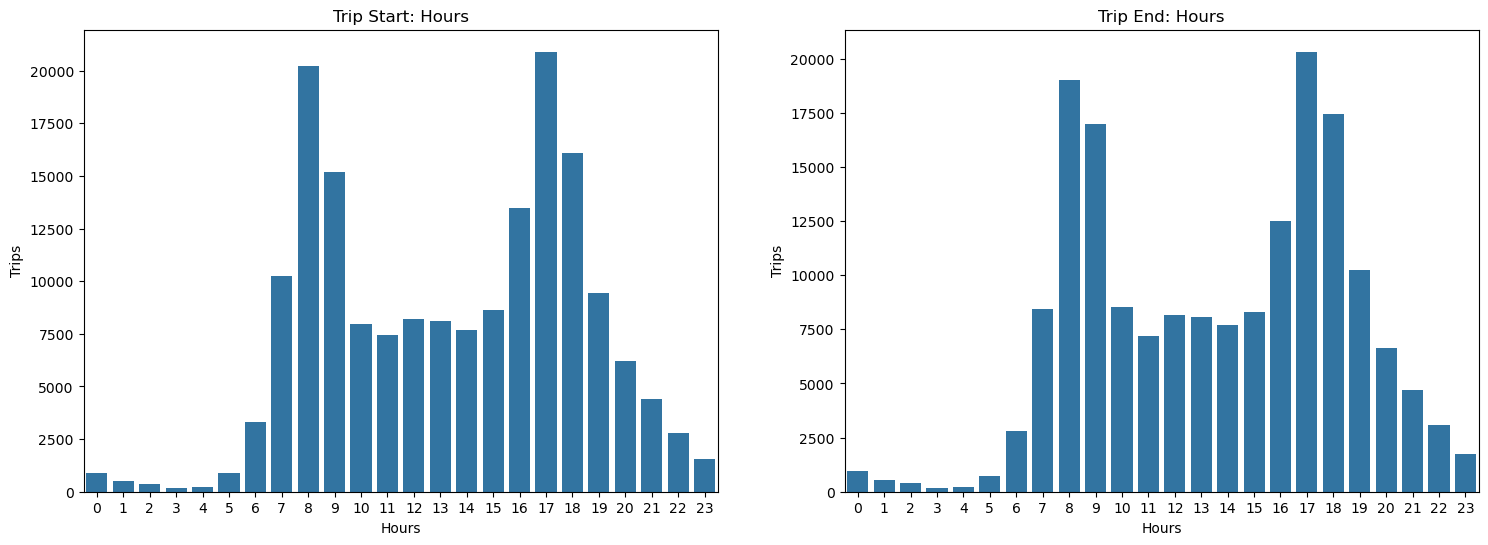

In [29]:
# figsize
plt.figure(figsize = [18, 6])

# define the bar color
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)

# create a countplot of the start_hour variable
sb.countplot(data = gobike, x = 'start_hour', color = base_color);
plt.title('Trip Start: Hours')
plt.xlabel('Hours');
plt.ylabel('Trips');

plt.subplot(1,2,2)

# create a countplot of the end_hour variable
sb.countplot(data = gobike, x = 'end_hour', color = base_color);
plt.title('Trip End: Hours')
plt.xlabel('Hours');
plt.ylabel('Trips');

The `start_hour` and `end_hour` plots follows a bimodal distribution with two peaks, with the second peak being the major mode.

From the plot, you can see took peak periods:
1. 7 AM - 9 AM
2. 4 PM - 7 PM

Before the first peak and after the second peak, we see a sharp increase in trips and fall in trips, respectively.

We can make an assumption that the first peak is people communting to work in large numbers. And the second peak are those returning home from work. 

We can strengthen this assumption by looking at which days during the week has the most rides.

### Start Day and End Day

In [30]:
# create a start_day and end_day variables
gobike['start_day'] = gobike['start_time'].dt.day_name()
gobike['end_day'] = gobike['end_time'].dt.day_name()

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ordered_week = pd.api.types.CategoricalDtype(days, ordered = True)


gobike['start_day'] = gobike['start_day'].astype(ordered_week)
gobike['end_day'] = gobike['end_day'].astype(ordered_week)

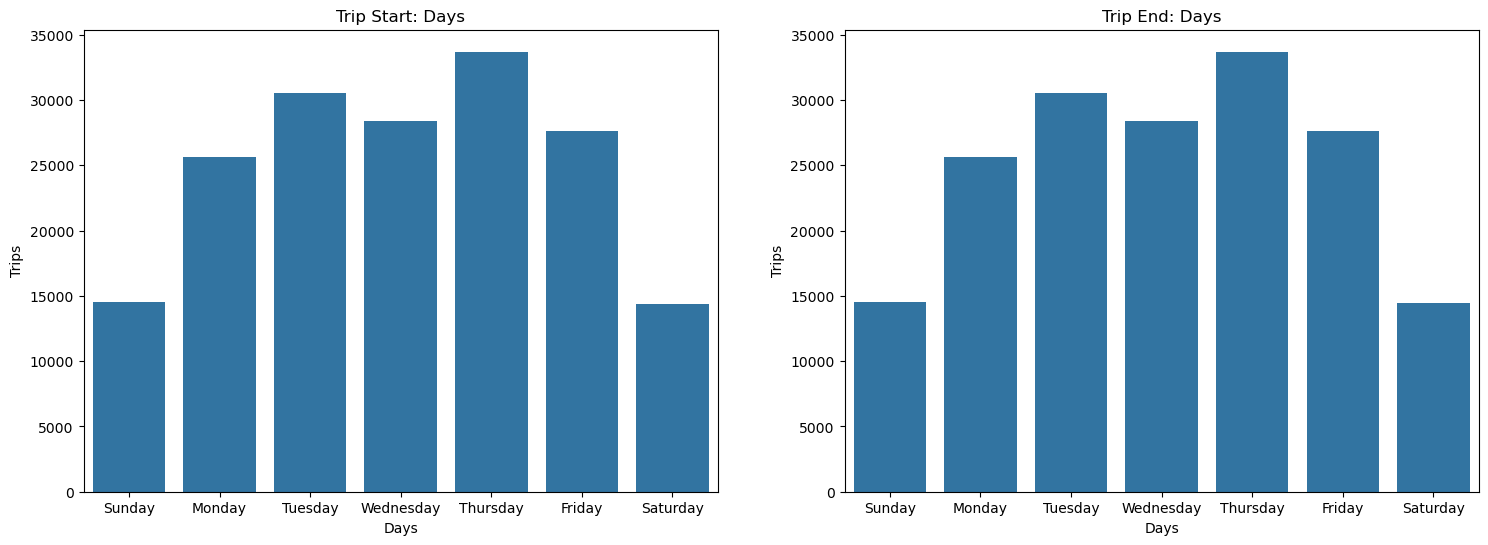

In [31]:
# figsize
plt.figure(figsize = [18, 6])

plt.subplot(1,2,1)

# create a countplot of the start_day variable
sb.countplot(data = gobike, x = 'start_day', color = base_color);
plt.title('Trip Start: Days')
plt.xlabel('Days');
plt.ylabel('Trips');

plt.subplot(1,2,2)

# create a countplot of the end_day variable
sb.countplot(data = gobike, x = 'end_day', color = base_color);
plt.title('Trip End: Days')
plt.xlabel('Days');
plt.ylabel('Trips');

From the plots, most gobike trips were made during the weekdays, with Thursday being the day with the highest number of trips.

These plots support our initial assumption that the peak ride hours are those commuting to and fro work. We can build on this assumption in a bivariate plot.

### Gender

Let's explore the gender makeup of the dataset. Do male use the bike services than female, or vice versa?

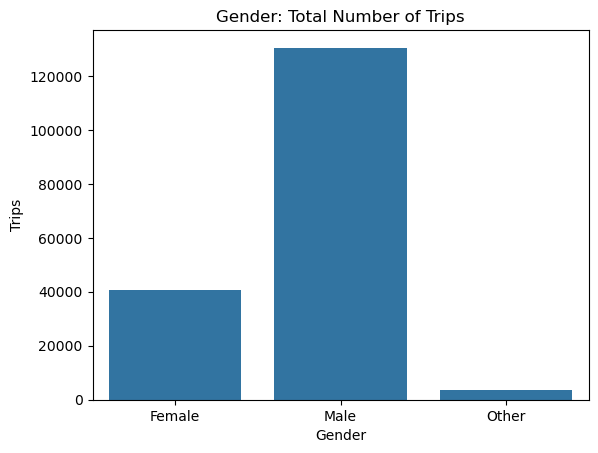

In [32]:
# plot the total number of rides per gender
sb.countplot(data = gobike, x = 'member_gender', color = base_color);
plt.title('Gender: Total Number of Trips')
plt.xlabel('Gender');
plt.ylabel('Trips');

The male gender makes most of the gobike sharing users.

It will be interesting to see which gender is more likely to take longer or shorter trips.

### Bike Sharing

We are interested in seeing the relative proportion trips that opted for bike sharing.

Bike sharing status may have a significant relationship with `duration_sec`.

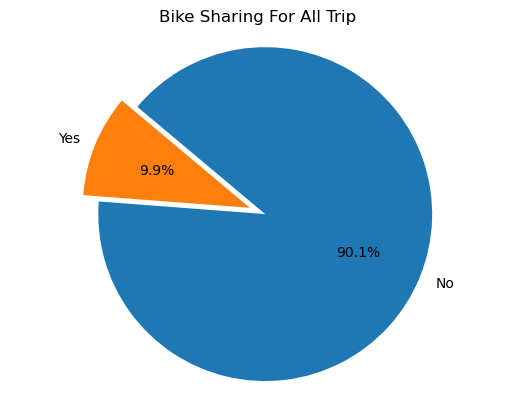

In [222]:
# find the count for each bike sharing status
share_count = gobike['bike_share_for_all_trip'].value_counts()
labels = share_count.index
explode = (0.0, 0.1)

# plot a pie chart
plt.pie(share_count, labels = labels, startangle = 140, counterclock = False, 
        autopct='%1.1f%%', explode = explode);
plt.title('Bike Sharing For All Trip')
plt.axis('equal');

90.1% of the rides did not involve bike sharing, which constitutes the majority.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Duration**: The distribution was right-skewed with a long tail. I applied log transformation and set an x-axis limit to focus on the range where the values are concentrated. Under the transformation, the distribution is unimodal with a peak at 500.

While the majority of the values were under 1500 seconds, I noticed that there were trips with over 3600 seconds. Upon investigation, I discovered they were not errors.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the trips were taken during the weekdays between 7-9 AM and 4-7 PM. That enable me to deduce that the users were mostly people commuting to and fro work.

**Age**: The dataset included people over 100 years as at 2019. A quick search on the Google shows that the oldest cyclist was 109 years old. This was possibly a system error. So, I removed ages over 98.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

We will explore the relationship between duration and other variables to see if there are interesting insights we can draw out.

### Duration and User Type

We need to know if there is an insight we can draw out from between duration and user type. Although subscriber make most of this dataset, it will be interesting to see if they go on longer trips than customers.

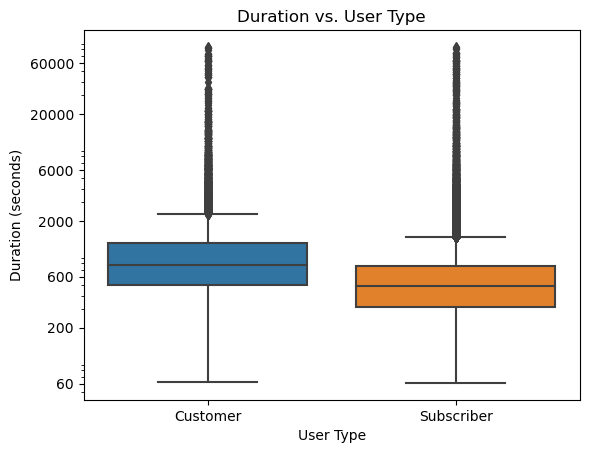

In [34]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000, 20000, 60000]
labels = ['{}'.format(v) for v in ticks]

# boxplot of duration and user_type
sb.boxplot(data = gobike, x = 'user_type', y = 'duration_sec');

# title
plt.title('Duration vs. User Type')

# x-axis label
plt.xlabel('User Type')

# y-axis scale transformation and labels
plt.ylabel('Duration (seconds)')
plt.yscale('log');
plt.yticks(ticks, labels);

The lower quartile of the customer user type is on the same level as the median of the subscriber user type.

Based of the median, customers (unsubscribed users) take longer trips than subscribers. So, while most of the top ten longest trips were made by subscribers, overall, customers take longer trips. One assumption we can make is that the customers are made up of tourists or people going on sight-seeing trips. It should be the latter as this dataset is for February, which is not a tourism season.

We need to note that bike-sharing has a limit of 45 minutes. In the multivariate plot, we will investigate the proportion of user types that use bike sharing for all trip based on duration.

**Let us create a customer segment and see which is the most frequent start and end stations**:

In [35]:
# sgement customer user type
gobike_customer = gobike[gobike['user_type'] == 'Customer']

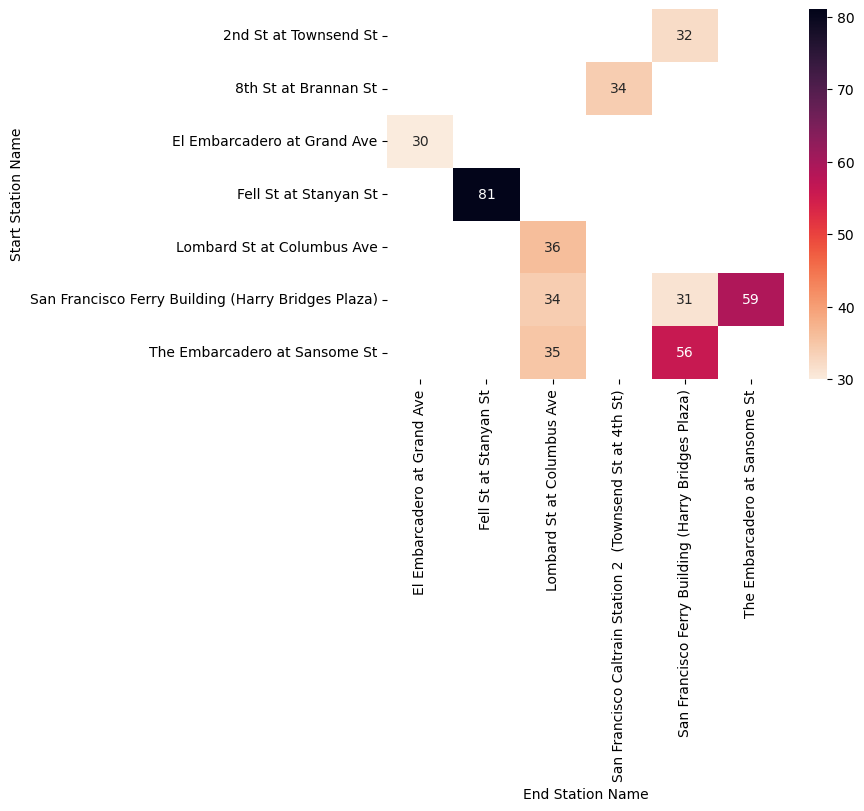

In [36]:
# create an heatmap of the most frequent routes
start_end_station = gobike_customer.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending = False)[:10]
start_end_station = start_end_station.reset_index(name = 'count')
start_end_station = start_end_station.pivot(index = 'start_station_name', columns = 'end_station_name', values = 'count')

sb.heatmap(start_end_station, fmt = '.0f', annot = True, cmap = 'rocket_r');
plt.xlabel('End Station Name')
plt.ylabel('Start Station Name');

These are some of the most popular streets and cycling hotspots in San Francisco. It makes sense that customers frequently use these routes, supporting our assumption that these users are on sight-seeing trips.

### Duration and Gender

Which of the gender tend to go on longer trips?

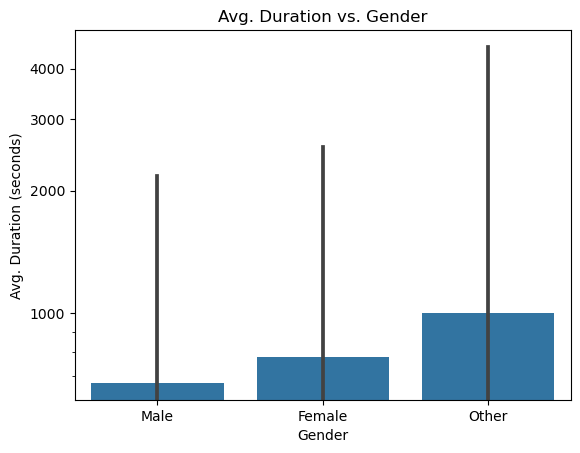

In [37]:
# set the ticks and labels
ticks = [1000, 2000, 3000, 4000]
labels = ['{}'.format(v) for v in ticks]

# barplot of duration vs. gender
sb.barplot(data = gobike, x = 'member_gender', y = gobike['duration_sec'], 
           ci = 'sd', color = base_color, order = ['Male', 'Female', 'Other']);

# title
plt.title('Avg. Duration vs. Gender')

# x-axis label
plt.xlabel('Gender')

# y-axis scale transformation and labels
plt.yscale('log');
plt.yticks(ticks, labels);
plt.ylabel('Avg. Duration (seconds)');

On an average, the Other gender and Female gender take trips of longer duration than Male. 

This is an interesting insight as it can help bike rental services determine who to target. However, it will be best to know what constitute the "Other" gender.

### Duration and Station

Our focus will be on the top ten start and end stations with the highest mean duration. We want to find out start and end stations for trips with the highest mean duration.

In [38]:
# create a variable focusing on the top ten start station
duration_start_station = gobike.groupby('start_station_name')['duration_sec'].mean().sort_values(ascending = False)[:10]
index = duration_start_station.index

# create a variable focusing on the top ten start station
duration_end_station = gobike.groupby('end_station_name')['duration_sec'].mean().sort_values(ascending = False)[:10]
index_end = duration_end_station.index

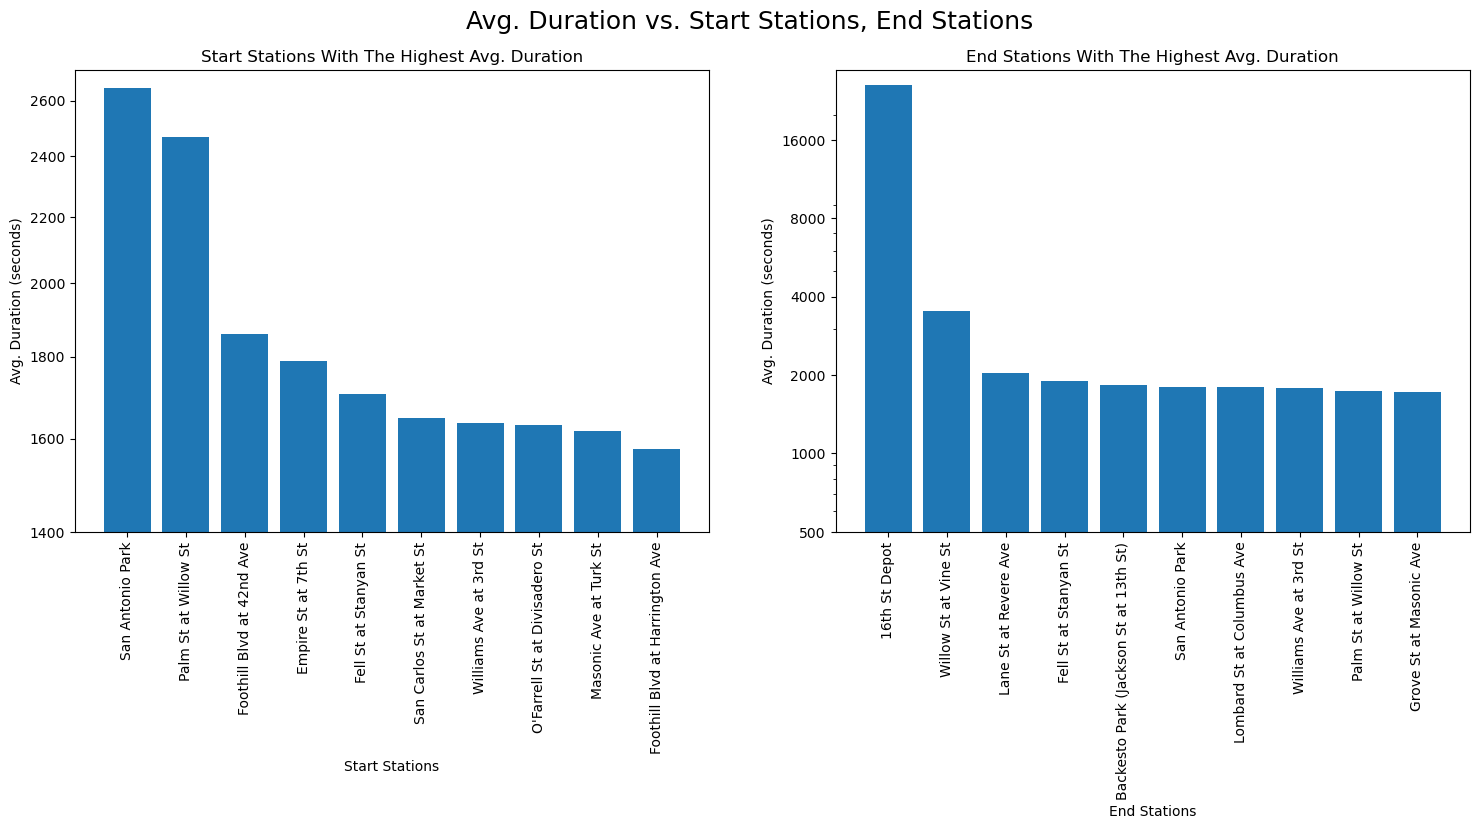

In [39]:
# figsize
plt.figure(figsize = [18,6])

plt.suptitle('Avg. Duration vs. Start Stations, End Stations', fontsize = 18)

plt.subplot(1,2,1) # start_station

ticks = [1400, 1600, 1800, 2000, 2200, 2400, 2600]
labels = ['{}'.format(v) for v in ticks]

plt.bar(index, duration_start_station);
plt.title('Start Stations With The Highest Avg. Duration', fontsize = 12)
plt.xlabel('Start Stations')
plt.xticks(rotation = 90);
plt.yscale('log')
plt.yticks(ticks, labels)
plt.ylabel('Avg. Duration (seconds)')

plt.subplot(1,2,2) # end_station

ticks = [500, 1000, 2000, 4000, 8000, 16000]
labels = ['{}'.format(v) for v in ticks]

plt.bar(index_end, duration_end_station);
plt.title('End Stations With The Highest Avg. Duration', fontsize = 12)
plt.xlabel('End Stations')
plt.xticks(rotation = 90);
plt.yscale('log')
plt.yticks(ticks, labels);
plt.ylabel('Avg. Duration (seconds)');


The end stations appear to have higher average trip duration than the start station. One station that stands out is the 16th St Depot with an average trip duration of over 16000 seconds. 

Let's pull out the trips for 16th St Depot:

In [40]:
gobike[gobike['end_station_name'] == '16th St Depot']

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_hour,end_hour,start_day,end_day
54376,69803,2019-02-20 17:46:28.420,2019-02-21 13:09:52.121,5,Powell St BART Station (Market St at 5th St),344,16th St Depot,4760,Customer,Female,No,30,17,13,Wednesday,Thursday
58518,457,2019-02-21 05:54:11.263,2019-02-21 06:01:48.366,125,20th St at Bryant St,344,16th St Depot,5334,Subscriber,Male,No,33,5,6,Thursday,Thursday
112435,83407,2019-02-11 16:25:33.069,2019-02-12 15:35:40.956,77,11th St at Natoma St,344,16th St Depot,1842,Customer,Male,No,31,16,15,Monday,Tuesday
112960,1384,2019-02-12 13:25:42.764,2019-02-12 13:48:46.992,61,Howard St at 8th St,344,16th St Depot,6192,Subscriber,Male,No,29,13,13,Tuesday,Tuesday
117106,504,2019-02-12 05:47:37.873,2019-02-12 05:56:02.102,125,20th St at Bryant St,344,16th St Depot,4941,Subscriber,Male,No,33,5,5,Tuesday,Tuesday
138818,446,2019-02-08 05:55:55.866,2019-02-08 06:03:22.775,125,20th St at Bryant St,344,16th St Depot,4889,Subscriber,Male,No,33,5,6,Friday,Friday


Two of the trips with the highest duration (83407, 69803) ended in 16th St Depot. That greatly affected the average duration of the trips for the station.

We should note that none of these stations are among the the top ten stations with the highest number of trips.

To draw more insights, it will be best to plot the distance between these stations to check whether that affects the trip duration. However, that won't be covered in this project.

### Duration and Bike Share

There is a limit of 45 minutes on the duration a bike can be checked out. So, it is expected for users to opt for no bike sharing for longer duration. Let's see if that holds true.

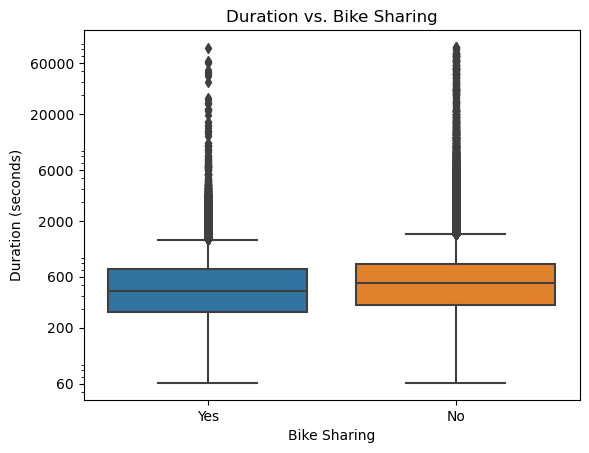

In [41]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000, 20000, 60000]
labels = ['{}'.format(v) for v in ticks]

# boxplot of duration and bike share
sb.boxplot(data = gobike, x = 'bike_share_for_all_trip', y = 'duration_sec', order = ['Yes', 'No']);

# title
plt.title('Duration vs. Bike Sharing')

# x-axis label
plt.xlabel('Bike Sharing')

# y-axis scale transformation and labels
plt.ylabel('Duration (seconds)')
plt.yscale('log');
plt.yticks(ticks, labels);

Users opt for no bike sharing for trips with longer duration. That supports our assumption.

### Duration and Age

Which age group is likely to take longer trips? Can age influence trip duration?

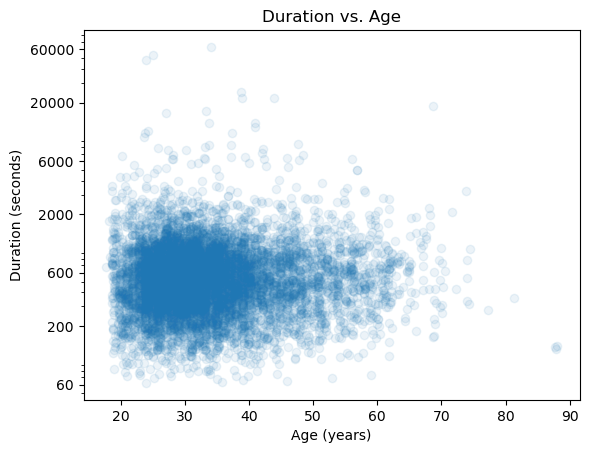

In [42]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000, 20000, 60000]
labels = ['{}'.format(v) for v in ticks]

# create a random sample of 500 trips so that plots are clearer and they render faster
gobike_samp = gobike.sample(n=8000, replace = False)

# create a regplot of age vs duration
sb.regplot(data = gobike_samp, x = 'member_age', y = 'duration_sec', 
           scatter_kws = {'alpha' : 1/12}, truncate = False, fit_reg = False, x_jitter = 0.4)
plt.title('Duration vs. Age')
plt.xlabel('Age (years)')
plt.yscale('log');
plt.yticks(ticks, labels)
plt.ylabel('Duration (seconds)');

As the user age increases, the duration and number of trips reduces. However, the relationship is weak.

### Duration and Day

On which days do we have trips with longer duration?

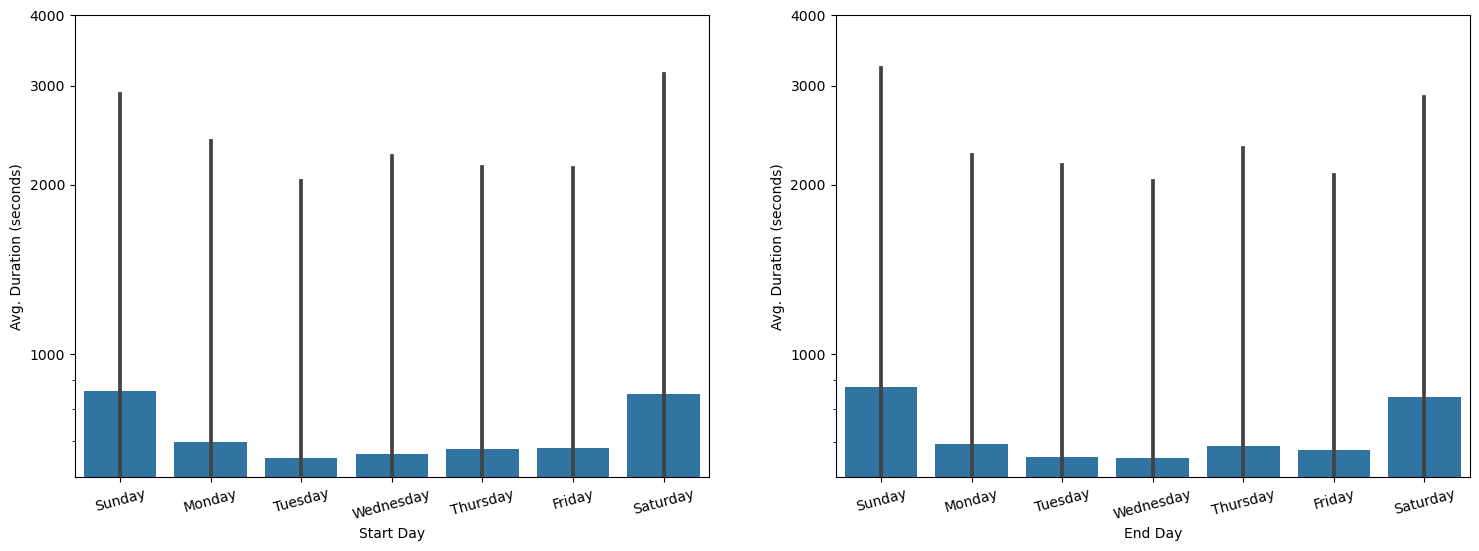

In [43]:
# set the ticks and labels
ticks = [1000, 2000, 3000, 4000]
labels = ['{}'.format(v) for v in ticks]

# figsize
plt.figure(figsize = [18,6])

plt.subplot(1,2,1) # start day
sb.barplot(data = gobike, x = 'start_day', y = 'duration_sec', 
           color = base_color, ci = 'sd');
plt.xticks(rotation = 15)
plt.xlabel('Start Day')

# y-axis scale transformation and labels
plt.yscale('log');
plt.yticks(ticks, labels);
plt.ylabel('Avg. Duration (seconds)');

plt.subplot(1,2,2) # end day
sb.barplot(data = gobike, x = 'end_day', y = 'duration_sec', 
           color = base_color, ci = 'sd');
plt.xticks(rotation = 15)
plt.xlabel('End Day')

# y-axis scale transformation and labels
plt.yscale('log');
plt.yticks(ticks, labels);
plt.ylabel('Avg. Duration (seconds)');

More long trips occur on weekends than on weekdays. This makes sense as people are likely to go sight-seeing on weekends than on weekdays.

In the multivariate plot, we should look at duration, day, time, and gender. Since Other and females take longer trips, do this happens on weekends? What time do these trips start and end on various days?

### User Type and Bike Sharing

Which user type is more likely to go for bike sharing?

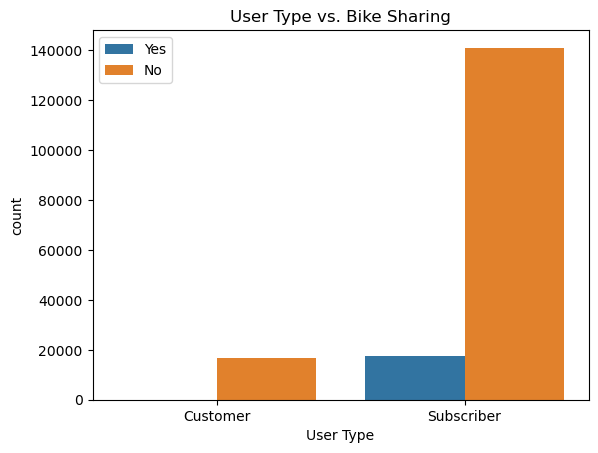

In [44]:
sb.countplot(data = gobike, x = 'user_type', hue = 'bike_share_for_all_trip', hue_order = ['Yes', 'No']);
plt.title('User Type vs. Bike Sharing')
plt.xlabel('User Type');
plt.legend(loc = 'upper left');

None of the customers went for bike sharing for their trips. While under 20,000 subscribers opted for bike sharing. 

Since customers go on longer trips than subscribers, it makes sense that none of them opted for bike sharing due to its time limit.

### User Type and Age

Do customers or subscribers tend to be older or younger?

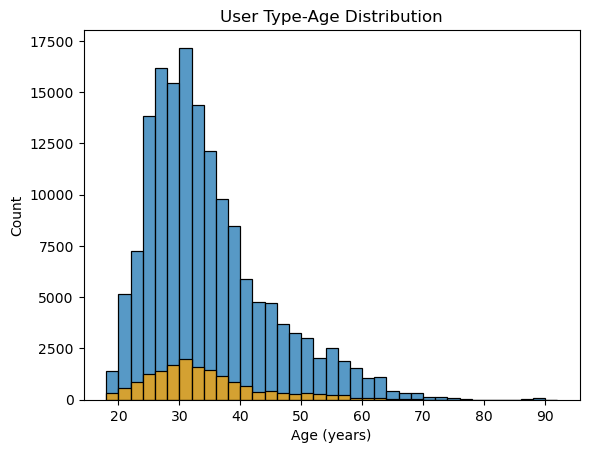

In [104]:
# subset the dataset for each user type
user_customer = gobike[gobike['user_type'] == 'Customer']
user_subscriber = gobike[gobike['user_type'] == 'Subscriber']

bin_edges = np.arange(18, 92+2, 2)

# plot the age distribution of each user type
sb.histplot(user_subscriber['member_age'], bins = bin_edges) # male users
sb.histplot(user_customer['member_age'], bins = bin_edges, color = 'orange') # female users
plt.title('User Type-Age Distribution')
plt.xlabel('Age (years)');

The age distribution of customers and subscribers peaks at 30-31 years. The two distributions are both unimodal and right-skewed. We can see that the majority of the user types are between 20-50 years old.

We can't see anything that might to age differences in between the user types.

### User Type and Day

From the plot of duration and user type, we discovered that customers take longer trips than customers. We assume that these trips may be happening on weekends. Let's look at the proportion of trips taken by customers to subscribers.

Since `start_day` have the same distribution as `end_day`, we will stick to using only the former.

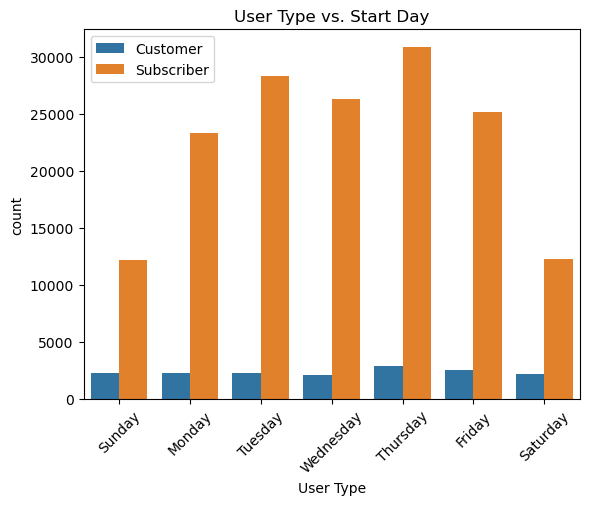

In [45]:
sb.countplot(data = gobike, x = 'start_day', hue = 'user_type');
plt.title('User Type vs. Start Day')
plt.xlabel('User Type');
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left');

We know that longer trips occur on weekends. So, it is important to see the proportion of customers to subscribers on weekends compared to that of weekdays.

In [46]:
# checking proportion of customer to subscriber on Sundays
sunday_check = gobike[gobike['start_day'] == 'Sunday']
sunday_check['user_type'].value_counts()/sunday_check.shape[0]

Subscriber    0.841492
Customer      0.158508
Name: user_type, dtype: float64

In [47]:
# checking proportion of customer to subscriber on Thursdays
thursday_check = gobike[gobike['start_day'] == 'Thursday']
thursday_check['user_type'].value_counts()/thursday_check.shape[0]

Subscriber    0.914909
Customer      0.085091
Name: user_type, dtype: float64

There are higher proportions of customers on weekends than on weekdays.

### Start Day and Hour

From the univariate plots, we saw that most trips occur during the weekdays and the peak periods follow the rush hours in the morning and evening. By plotting day and hour together, will they retain their distribution or we will see something different.

Since `start_hour` have the same distribution as `end_hour`, we will stick to using only the former.

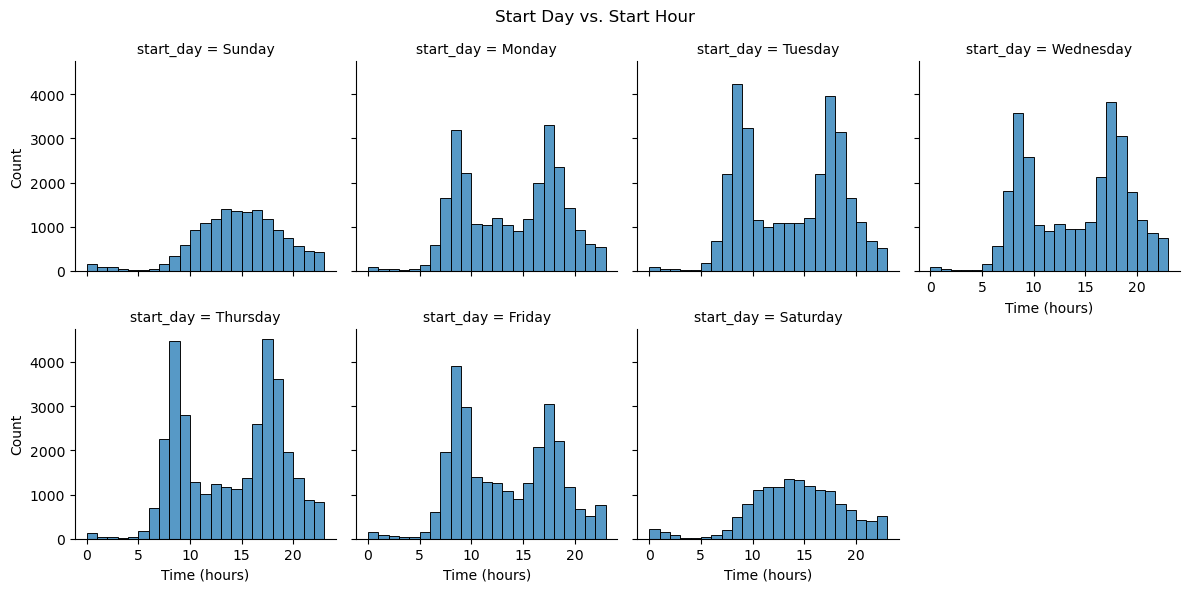

In [48]:
bins = np.arange(0, 23+1, 1)
g = sb.FacetGrid(data = gobike, col = 'start_day', col_wrap = 4)
g.fig.suptitle('Start Day vs. Start Hour');
g.map(sb.histplot, 'start_hour', bins = bins);
g.set_xlabels('Time (hours)');

The peak periods are similar during the weekdays, but different on weekends. 

During the weekends, we see a rise in trips by 12AM. That is interesting as it means people are going out for midnight bike trips in the city.

These plots follow our assumption that most of the trips made during weekdays are those commuting to and fro work.

### Gender and Age

Let's explore the age-distribution of each gender. Do any gender tend to be older or younger?

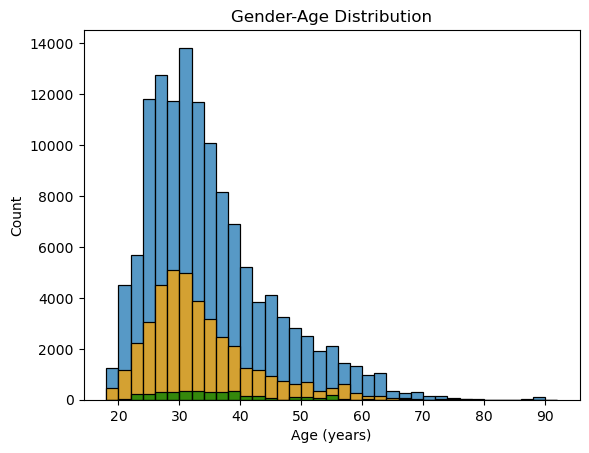

In [106]:
# subset the dataset for each gender
gender_female = gobike[gobike['member_gender'] == 'Female']
gender_male = gobike[gobike['member_gender'] == 'Male']
gender_other = gobike[gobike['member_gender'] == 'Other']

bin_edges = np.arange(18, 92+2, 2)

# plot the age distribution of each gender
sb.histplot(gender_male['member_age'], bins = bin_edges) # male users
sb.histplot(gender_female['member_age'], bins = bin_edges, color = 'orange') # female users
sb.histplot(gender_other['member_age'], bins = bin_edges, color = 'green'); # other users
plt.title('Gender-Age Distribution')
plt.xlabel('Age (years)');

The age distribution of all user genders are quite similar. They are all unimodal and right-skewed.

### Gender and Bike Sharing

Are there bike sharing preferences between the different gender?

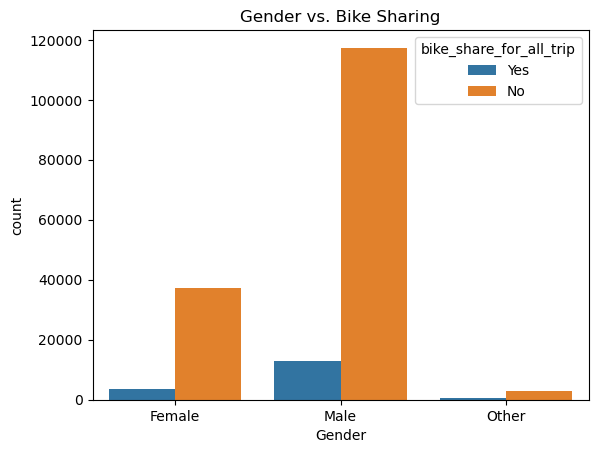

In [183]:
# countplot of gender vs. bike sharing
sb.countplot(data = gobike, x = 'member_gender', hue = 'bike_share_for_all_trip', hue_order = ['Yes', 'No']);
plt.title('Gender vs. Bike Sharing')
plt.xlabel('Gender');

Bike sharing status is similar across all genders. Everyone prefers going for no bike sharing.

### Age and Bike Sharing

Who is likely to opt for bike sharing? Younger or older users?

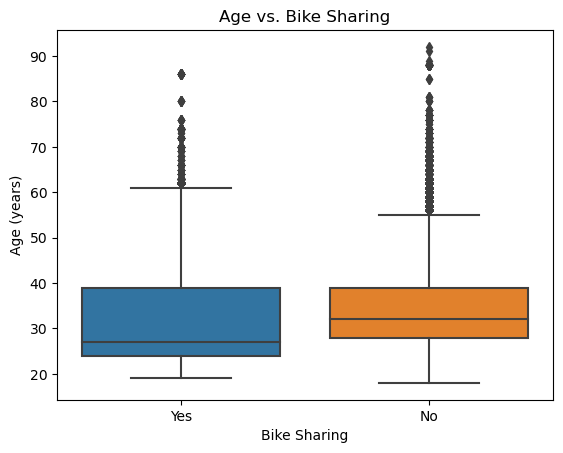

In [51]:
# create a boxplot of age vs. bike sharing
sb.boxplot(data = gobike, y = 'member_age', x = 'bike_share_for_all_trip', order = ['Yes', 'No']);
plt.title('Age vs. Bike Sharing')
plt.xlabel('Bike Sharing');
plt.ylabel('Age (years)');

While they share the same upper-quartile, the median age is much lower for people using bike sharing. That means bike sharing is associated with younger people.

### Start Station and End Station

Let's find out the most frequented routes. That is the top ten start and end stations for most trips.

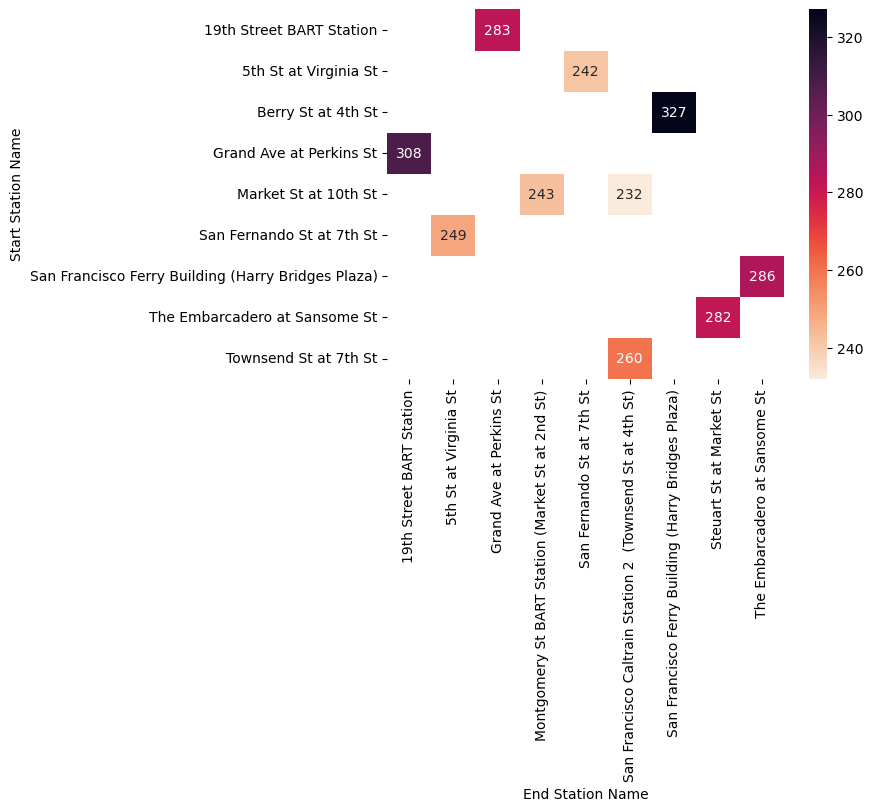

In [52]:
start_end_station = gobike.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending = False)[:10]
start_end_station = start_end_station.reset_index(name = 'count')
start_end_station = start_end_station.pivot(index = 'start_station_name', columns = 'end_station_name', values = 'count')

# create a heatmap 
sb.heatmap(start_end_station, fmt = '.0f', annot = True, cmap = 'rocket_r');
plt.xlabel('End Station Name')
plt.ylabel('Start Station Name');

The most frequent route is between Berry St at 4th St and San Franscisco Ferry Building (Harry Bridges Plaza). We see that the start stations and end stations are almost similar.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- **Duration and User Type**: Customers tend to go on longer trips than subscribers. We can assume that the customers constitute of people going for sight-seeing. We focused on the customer segment and checked the frequent routes used by customers. The heatmap revealed that customers frequented areas that are some of the popular in San Francisco.

- **Duration and Gender**: We discovered that the "Other" gender and Females go on trips of longer durations than Males.

- **Duration and Age**: There is weak negative relationship between duration and user age. As user age increases, we see a decrease in duration and number of trips.

- **Duration and Day**: We see longer trips happening on weekends than on weekdays. This further support our sight-seeing assumption. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- **User Type and Day**: Higher proportion of customers go for trips on weeekends compared to weekdays. 

- **User Type and Bike Sharing**: We have 0 customer opting for bike sharing. All the users that opt for bike sharing are subscribers.

- **Age and Bike Sharing**: Bike sharing is associated with younger people. This makes sense as younger people will value cost over comfort.

- **Day and Time**: This is another evidence of our assumption that trips during the weekdays are those commuting to and fro week. We see peak hours during the weekdays between 7 AM - 9 AM and 4 PM - 7 PM. Another thing of note is the midnight trips that mostly occur on weekends. We can guess that they are people going for fun activities. But we will need more data to support that assumption.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Duration, User Type, and Gender

In the bivariate plot, we discovered that customers and other and female genders go on longer bike trips. 

Let's see if pull an insight from a plot of the three variables:

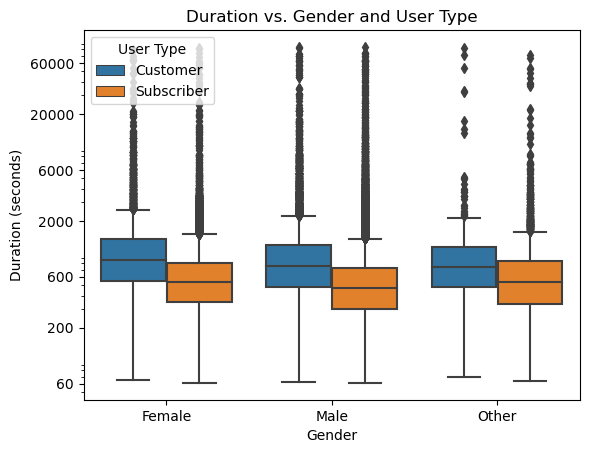

In [224]:
ticks = [60, 200, 600, 2000, 6000, 20000, 60000]
labels = ['{}'.format(v) for v in ticks]

sb.boxplot(data = gobike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
plt.title('Duration vs. Gender and User Type')

plt.xlabel('Gender')

plt.yscale('log');
plt.yticks(ticks, labels)
plt.ylabel('Duration (seconds)')
plt.legend(title = 'User Type', loc = 'upper left');

Customers across all gender go on longer trips than Subscribers. But more Other and Female customers go on longer trips than Male customers. We see the same trend for subscribers, where Other and Female subscribers go on longer trips than Male subscribers.

### Duration, User Type, and Age

From the bivariate, we saw longer trip durations are associated with customers. We want to investigate whether there is whether member age is contributing to that. 

In [60]:
# create a random sample of 1000 to avoid overplotting
gobike_samp = gobike.sample(n=1000, replace = False)

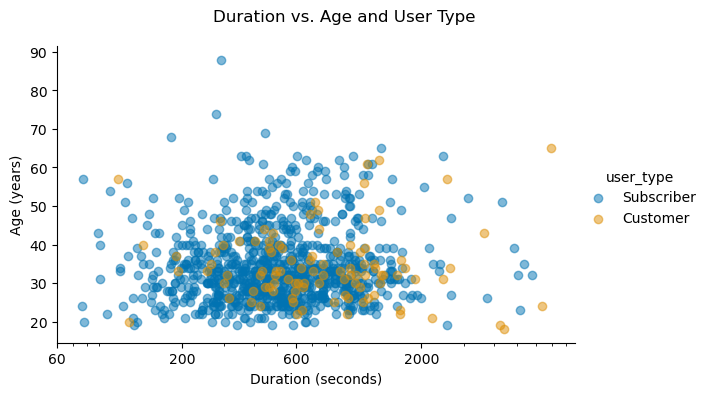

In [138]:
# set x-axis ticks and labels
ticks = [60, 200, 600, 2000]
labels = ['{}'.format(v) for v in ticks]

# create a FacetGrid
g = sb.FacetGrid(data = gobike_samp, hue = 'user_type', hue_order = ['Subscriber', 'Customer'], height = 4, 
                 aspect = 1.5, palette = 'colorblind')
g.fig.suptitle('Duration vs. Age and User Type');
g.map(sb.regplot, 'duration_sec', 'member_age', x_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha': 0.5});

plt.xscale('log')
plt.xticks(ticks, labels);
g.set_xlabels('Duration (seconds)')

g.set_ylabels('Age (years)')

g.add_legend();

With the introduction of `member_age`, there is no apparent relationship between the three variables. We can see that most values are under 2000 seconds, with an age range of 20-50.

### Duration, Bike Sharing, and Age

1 numeric and two cat

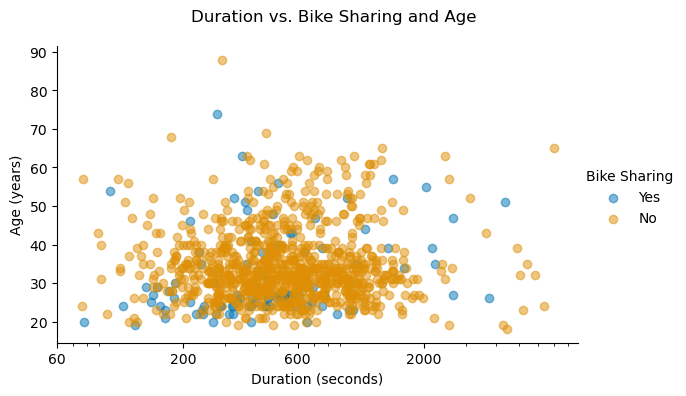

In [139]:
# set x-axis ticks and labels
ticks = [60, 200, 600, 2000]
labels = ['{}'.format(v) for v in ticks]

# create a FacetGrid
g = sb.FacetGrid(data = gobike_samp, hue = 'bike_share_for_all_trip', hue_order = ['Yes', 'No'], height = 4, 
                 aspect = 1.5, palette = 'colorblind')
g.fig.suptitle('Duration vs. Bike Sharing and Age');
g.map(sb.regplot, 'duration_sec', 'member_age', x_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha': 0.5});

plt.xscale('log')
plt.xticks(ticks, labels);
g.set_xlabels('Duration (seconds)')

g.set_ylabels('Age (years)')

g.add_legend(title = 'Bike Sharing');

### Duration, User Type, and Day

In the bivariate plots, we discovered that customers usually go on longer trips, and most trips with longer durations occur on weekends. 

Let's see the insight we can pull out when we plot these three variables.

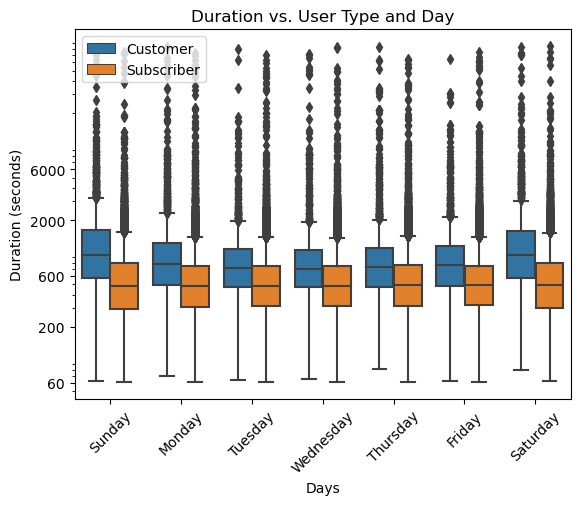

In [181]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000]
labels = ['{}'.format(v) for v in ticks]

# create a barplot of duration, day, and user type
sb.boxplot(data = gobike, x = 'start_day', y = 'duration_sec', hue = 'user_type');
plt.title('Duration vs. User Type and Day')

plt.xlabel('Days')
plt.xticks(rotation = 45)

plt.yscale('log');
plt.yticks(ticks,labels)
plt.ylabel('Duration (seconds)');

plt.legend(loc = 2);

Customers go on longer trips all across the week. But the trip durations are longer on weekends.

This tells us that regardless of the day of the week, customers go on longer trips than subscribers. That assert our assumption the customer user type is constituted of tourists or sightseers. 

### Duration, Day, and Time

2 numeric, 1 cat

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


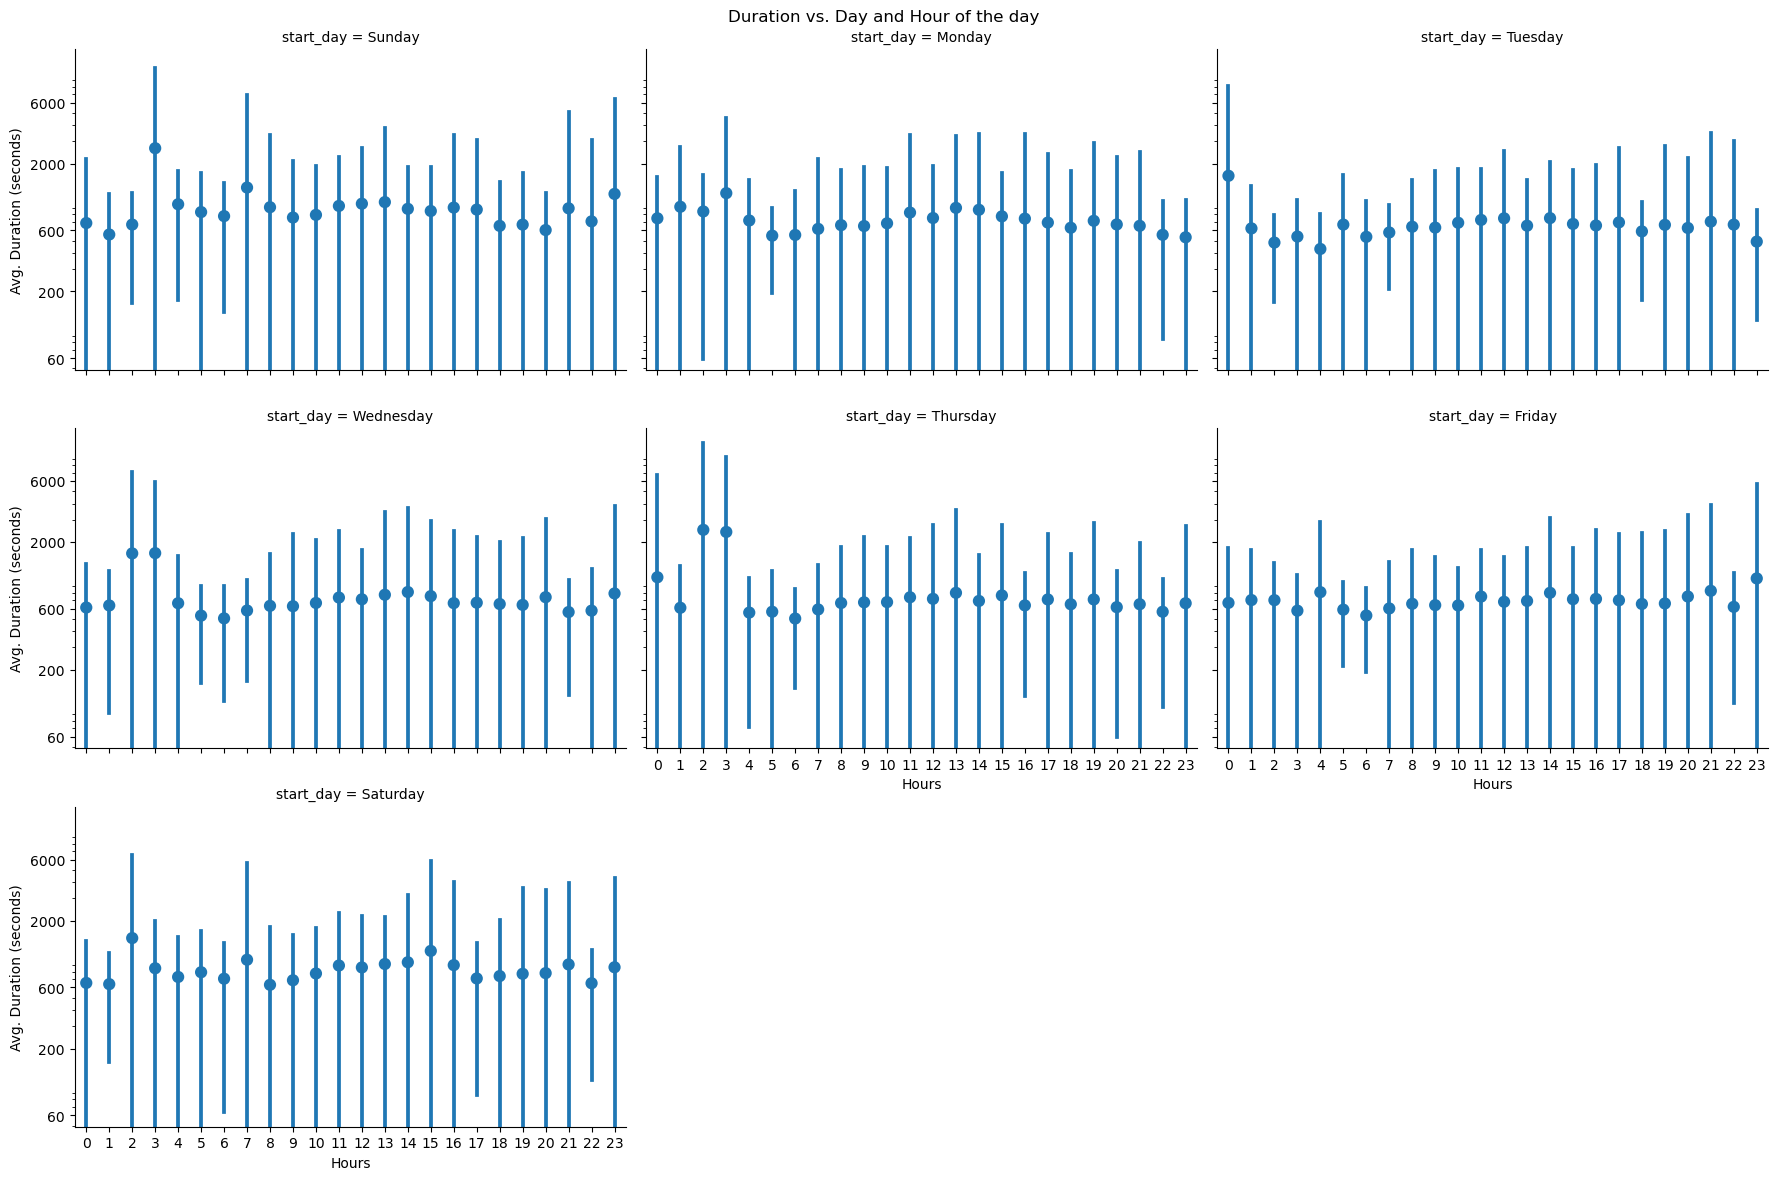

In [218]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000]
labels = ['{}'.format(v) for v in ticks]

g = sb.FacetGrid(data = gobike, col = 'start_day', col_wrap = 3, 
                 height = 4, aspect = 1.5, palette = 'colorblind')
g.fig.suptitle('Duration vs. Day and Hour of the day')
g.map(sb.pointplot, 'start_hour', 'duration_sec', ci = 'sd', linestyles = '')

g.set_xlabels('Hours')

plt.yscale('log');
plt.yticks(ticks, labels)
g.set_ylabels('Avg. Duration (seconds)');

One interesting thing that stands out from this plot is that long trips are occuring between 12 AM - 3 PM on most days, aside Friday. 

I am inclined to think that these are outliers, but a quick research on Google showed that this is something occurs in the city. Still, it's rare for people to cycle for hours at night.

Let's see if the people taking these midnight trips are customers or subscribers.

### Duration, User Type, and Hour

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


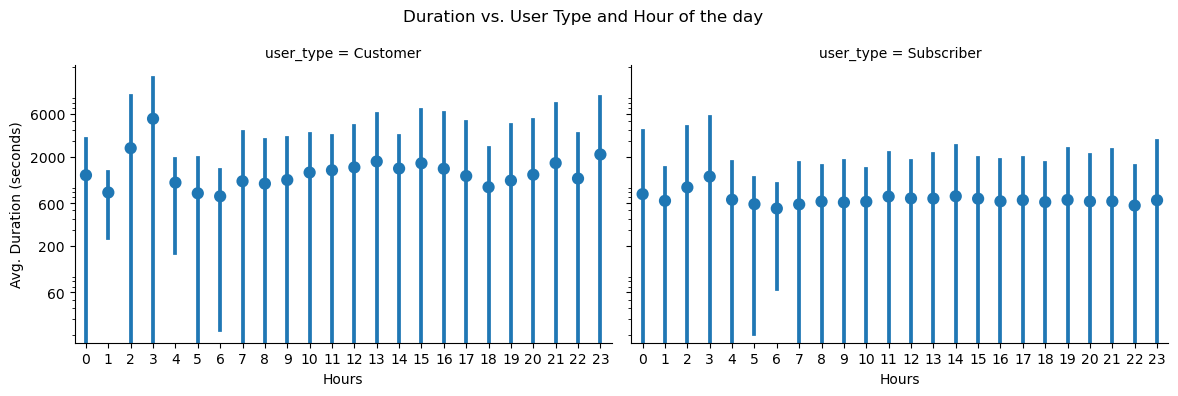

In [219]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000]
labels = ['{}'.format(v) for v in ticks]

g = sb.FacetGrid(data = gobike, col = 'user_type', 
                 height = 4, aspect = 1.5, palette = 'colorblind')
g.fig.suptitle('Duration vs. User Type and Hour of the day')
g.map(sb.pointplot, 'start_hour', 'duration_sec', ci = 'sd', linestyles = '')

g.set_xlabels('Hours')

plt.yscale('log');
plt.yticks(ticks, labels)
g.set_ylabels('Avg. Duration (seconds)');

We midnight trips of longer duration taken by both user types, though customer take much longer trips.

### Age, Bike Sharing, and Gender

In the bivariate plot, we see more younger people going for bike sharing than older people. However, bike sharing was mainly no for all genders. Let's see if we can draw out any information when we plot the variables together.

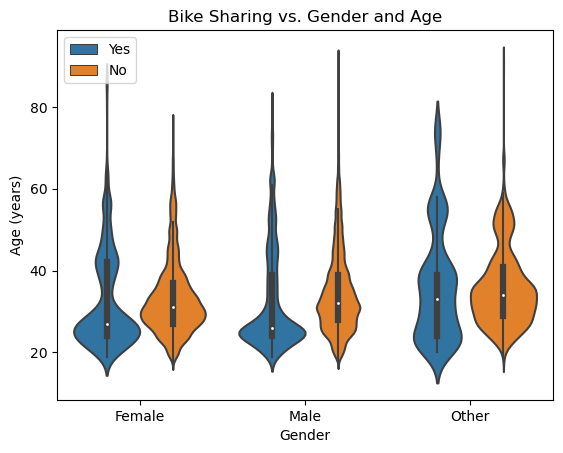

In [225]:
# create a barplot of duration, day, and user type
sb.violinplot(data = gobike, x = 'member_gender', y = 'member_age', hue = 'bike_share_for_all_trip', hue_order = ['Yes', 'No']);
plt.title('Bike Sharing vs. Gender and Age')

plt.xlabel('Gender')
plt.ylabel('Age (years)');

plt.legend(loc = 2);

The age upper-quartile of females is higher than the other genders, while the median age of males is the lowest (26 years) for those that opt for bike sharing, Other is the highest (33 years). This reveals that users that opt for bike sharing are mainly young male and female, with older people of other gender.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the plots, we discovered that customers take longer trips regardless of their gender. However, female and other take longer rides than their male counterpart. Also, customers take longer trips throughout the week than subscribers. From these insights we can assert that customers are majorly made up of tourists or sightseers.

We noticed that male of younger ages tend to opt for bike sharing compared to the other gender. However, the Other gender that opt for bike sharing are usually older compared to male and female.

### Were there any interesting or surprising interactions between features?

**Duration, user type, and day, time**: We see that users take longer rides at midnight than during the day. This stands as an outlier as it's less safer to cycle at night. Also, we discovered that the trend is the same for both customer and subscriber.